Neste exercício vamos utilizar os dados recolhidos ainda na primeira atividade para fazer o que foi pedido. Na célula abaixo, importamos os dados e apresentamos em formato de tabela as 5 primeiras ocorrências do csv, ou seja, as 5 primeiras reportagens coletadas na primeira atividade. 

In [102]:
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from unicodedata import normalize
nltk.download('punkt')
nltk.download('rslp')
nltk.download('stopwords')

data = pd.read_csv('./results.csv', sep=',')
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,subtitle,author,date,section,text,url
0,“A sociedade foi Rubens Paiva não os facínora...,A decisão da juíza que proíbe as Forças Armada...,F. M.,30/03/2019 00:11:08,Brasil,A juíza federal Ivani Silva da Luz de Brasíli...,https://brasil.elpais.com/brasil/2019/03/26/po...
1,Justiça suspende decisão que proibia Forças Ar...,Liminar havia sido concedida na sexta-feira a ...,Marina Rossi,30/03/2019 16:17:59,Brasil,Menos de 24 horas depois de a juíza federal Iv...,https://brasil.elpais.com/brasil/2019/03/30/po...
2,Governo Bolsonaro prega “negacionismo históric...,Marcos Napolitano professor da USP diz que o...,Regiane Oliveira,04/04/2019 22:37:48,Brasil,Quando determinou que de 31 de março 1964 u...,https://brasil.elpais.com/brasil/2019/04/05/po...
3,Quando os pais de Gabo perceberam que tinham u...,Gustavo Tatis percorre o universo de García Má...,Jesús Ruiz Mantilla,07/03/2019 16:38:56,Cultura,Quando era pequeno Luisa e Gabriel se preo...,https://brasil.elpais.com/brasil/2019/03/06/cu...
4,Rádios canadenses banem músicas de Michael Jac...,Quebec Cogeco Media toma a decisão após queixa...,Jaime Porras Ferreyra,07/03/2019 16:12:37,Cultura,Desde a manhã da última segunda-feira e ...,https://brasil.elpais.com/brasil/2019/03/06/cu...


# Questão 1

Abaixo, utilizamos a biblioteca *nltk* para tokenizar os textos de cada reportagem e apresentamos em formato de tabela uma parte do texto original e uma parte do texto tokenizado.
Vale ressaltar que aqui, além da estratégia de tokenização da própria biblioteca, colocamos todos os tokens em **caixa baixa**. Além disso, removeremos também as **stopwords** e as palavras com tamanho menor que 3.

Na atividade anterior, utilizamos **expressões regulares** para a realização desse processo de tokenização, no entanto, verificamos que da forma como foi feito muitas das palavras perdiam seu sentido, além de não considerarmos strings numéricas. Dessa forma, esse método é claramente mais completo. 

In [103]:
textData = pd.DataFrame(data['text'], columns=['text'])
textData['tokenizedText'] = data.apply(lambda row: nltk.word_tokenize(row['text'].decode('utf-8').lower(), language='portuguese'), axis=1)
textData.head()

,text,tokenizedText
0,A juíza federal Ivani Silva da Luz de Brasíli...,"[a, juíza, federal, ivani, silva, da, luz, de,..."
1,Menos de 24 horas depois de a juíza federal Iv...,"[menos, de, 24, horas, depois, de, a, juíza, f..."
2,Quando determinou que de 31 de março 1964 u...,"[quando, determinou, que, de, 31, de, março, 1..."
3,Quando era pequeno Luisa e Gabriel se preo...,"[quando, era, pequeno, luisa, e, gabriel, se, ..."
4,Desde a manhã da última segunda-feira e ...,"[desde, a, manhã, da, última, segunda-feira, e..."


A partir dessa tabela, iremos calcular algumas das estátisticas da nossa coleção que serão úteis ao longo dessa atividade.

São elas:



*   Total de ocorrências de palavras
*   Tamanho do vocabulário

In [0]:

stopwords = nltk.corpus.stopwords.words('portuguese')
wordsList = []
for wordList in textData.tokenizedText:
  for word in wordList:
    if word not in stopwords and len(word) >= 3:
      wordsList.append(word)

words = pd.DataFrame(wordsList, columns=['word'])

word_count = words.word.value_counts().reset_index()
word_count.columns = ['word', 'frequency']
word_count['rank'] = word_count.frequency.rank(ascending=False)

totalWordsOccurrences = word_count.frequency.sum()
vocabularySize = word_count.word.count()


# Questão 2

Para reproduzirmos a tabela 4.2 do livro texto, precisaremos de algumas informações já previamente calculadas e a probabilidade de uma palavra ocorrer na coleção. Levaremos em consideração que essa probabilidade é dada pelo total de vezes que a palavra ocorre na coleção dividido pelo total de palavras da própria coleção.



In [105]:
table2 = word_count
table2['Pr(%)'] = (word_count['frequency']/totalWordsOccurrences) * 100
table2['r.Pr'] = (table2['Pr(%)'] / 100) * table2['rank']
table2.head(n = 50)

,word,frequency,rank,Pr(%),r.Pr
0,anos,574,1.0,0.489373,0.004894
1,ser,504,2.0,0.429693,0.008594
2,sobre,420,3.0,0.358078,0.010742
3,presidente,367,4.0,0.312892,0.012516
4,bolsonaro,352,5.0,0.300103,0.015005
5,governo,348,6.0,0.296693,0.017802
6,ainda,328,7.0,0.279642,0.019575
7,país,324,8.0,0.276231,0.022099
8,brasil,323,9.0,0.275379,0.024784
9,ter,256,10.0,0.218257,0.021826


# Questão 3

Para a realização do *stemming* iremos utilizar a própria biblioteca **nltk**.

In [0]:
stemmer = nltk.stem.RSLPStemmer()

stemmedWordsList = []
for word in wordsList:
  stemmedWordsList.append(stemmer.stem(word))
    
stemmedWords = pd.DataFrame(stemmedWordsList, columns=['word'])
stemmed_word_count = stemmedWords.word.value_counts().reset_index()
stemmed_word_count.columns = ['word', 'frequency']
stemmed_word_count['rank'] = word_count.frequency.rank(ascending=False)


Para realizarmos a identificação de falsos positivos e negativos após o *stemming*, iremos comparar lado a lado as palavras antes e após o processo.

In [107]:
compareTable = pd.DataFrame(stemmedWordsList, columns=['Stemmed Words'])
compareTable['Words'] = wordsList

compareTable.head(100)

,Stemmed Words,Words
0,juíz,juíza
1,feder,federal
2,ivan,ivani
3,silv,silva
4,luz,luz
5,brasíl,brasília
6,proib,proibiu
7,carát,caráter
8,limin,liminar
9,nest,nesta


Na tabela acima, podemos perceber a presença de várias palavras que foram reduzidas a radicais corretos como por exemplo *brasileiro* e *brasilia* que foram reduzidos para *brasil*  mas também exemplos que foram reduzidos erroneamente como *sexta-feira* que foi reduzida para *sexta-f*. 

Abaixo temos 10 ocorrências de cada um dos casos possíveis de processamentos equivocados.

Falsos Positivos:

*   lei/leia -> lei
*   quarta/quarto/quartéis -> quart
*   terça/terço/terços -> ter
*   sal/sala -> sal,
*   briga/brigada -> brig
*   can/cana/cano/canais -> can
*   falar/falido -> fal
*   maia/maio -> mai
*   meses/mesa -> mes
*   mãe/mão -> mã

Falsos Negativos:

*   acha/acham/achand/acho
*   viag/viagens
*   terc/terceir
*   super/superior
*   roupag/roupagens
*   regul/regulament
*   passag/passageir
*   neoliber/neoliberal
*   documento/documentos
*   secret/secretári

O problema causado por essas transformações é justamente o indexamento de palavras colocadas na consulta, ou seja, resultados similares ao que foi pesquisado deixaram de aparecer assim como aparecerão mais resultados sem relação com o que foi pesquisado.   

# Questão 4


Para responder a essa questão faremos alguns processamentos necessários e apresentaremos a tabela resultante.

In [108]:

totalStemmedWordsOccurrences = stemmed_word_count.frequency.sum()
stemmedVocabularySize = stemmed_word_count.word.count()

table4 = stemmed_word_count
table4['Pr(%)'] = (stemmed_word_count['frequency']/ totalStemmedWordsOccurrences) * 100
table4['r.Pr'] = (table4['Pr(%)']/100) * table4['rank']
table4

,word,frequency,rank,Pr(%),r.Pr
0,ano,778,1.0,0.663296,0.006633
1,pod,631,2.0,0.537969,0.010759
2,brasil,579,3.0,0.493636,0.014809
3,ser,540,4.0,0.460386,0.018415
4,outr,524,5.0,0.446744,0.022337
5,part,488,6.0,0.416052,0.024963
6,tod,488,7.0,0.416052,0.029124
7,presid,452,8.0,0.385360,0.030829
8,govern,443,9.0,0.377687,0.033992
9,país,441,10.0,0.375982,0.037598


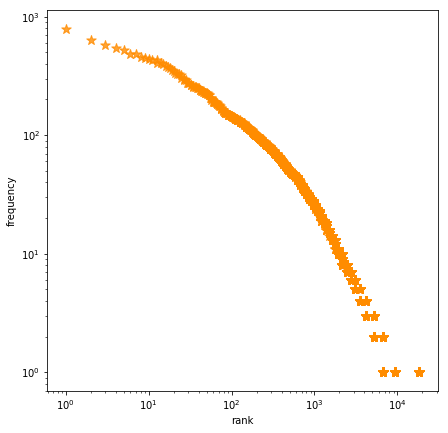

In [109]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("rank", "frequency", table4, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#FF8C00')

Podemos perceber certa similaridade com o gráfico da tarefa anterior.

Abaixo iremos mostrar a tablea relacionando bigrama e ranking, no entanto não há como fazer comparação com a tarefa anterior.

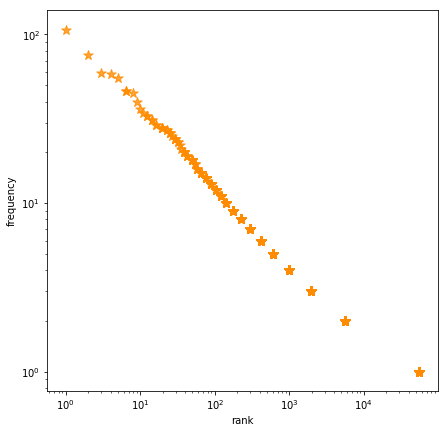

In [110]:
bigrams = nltk.bigrams(stemmedWordsList)
bigrams_freq = nltk.FreqDist(bigrams)
bigrams_table = pd.DataFrame(bigrams_freq.most_common(), columns=['word', 'frequency'])
bigrams_table['rank'] = bigrams_table['frequency'].rank(ascending=False)

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("rank", "frequency", bigrams_table, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#FF8C00')
